In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import re
import mailbox

In [2]:
df = pd.read_csv('datafile.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999998 entries, 0 to 9999997
Data columns (total 8 columns):
Unnamed: 0       int64
event_time       object
event_type       object
product_id       int64
category_code    object
brand            object
price            float64
user_id          int64
dtypes: float64(1), int64(3), object(4)
memory usage: 610.4+ MB


In [33]:
df.head()

,Unnamed: 0,event_time,event_type,product_id,category_code,brand,price,user_id
0,3967559,2019-10-04 08:11:58 UTC,view,1001588,electronics.smartphone,meizu,128.26,525199888
1,2628431,2019-10-03 05:53:24 UTC,view,1001588,electronics.smartphone,meizu,128.28,518720832
2,51776,2019-10-01 03:35:11 UTC,view,1001588,electronics.smartphone,meizu,128.31,554199941
3,2628354,2019-10-03 05:53:19 UTC,view,1001588,electronics.smartphone,meizu,128.28,518720832
4,4701726,2019-10-04 16:41:49 UTC,view,1001588,electronics.smartphone,meizu,128.25,556792578


In [5]:
# products been view and purchase comparing
product_event = pd.pivot_table(df, index='product_id', columns='event_type', values='price', aggfunc='count',fill_value = 0)
product_event.head()

event_type,cart,purchase,view
product_id,,,
1000978,0,0,20
1001588,0,3,460
1001606,0,0,4
1002042,5,3,300
1002062,0,5,63


In [7]:
##add new 3 columns. Ratio of customer behaviors    
product_eventvalid = product_event.loc[product_event.purchase > 5].reset_index().sort_values(by=['purchase'], ascending = False).head(100)
eventtotal = product_eventvalid['product_id']

purchase = product_eventvalid.groupby(by = eventtotal)['purchase'].sum()
view = product_eventvalid.groupby(by = eventtotal)['view'].sum()
cart = product_eventvalid.groupby(by = eventtotal)['cart'].sum()

purchased_by_viewed = purchase/view
carted_by_viewed = cart/view
purchased_by_carted = cart/purchase
purchased_by_carted

product_id
1002524     1.375252
1002532     1.409326
1002544     1.443329
1002547     1.481967
1002629     1.414414
              ...   
5100572     1.273196
5100816     2.505516
10701101    2.293269
12703015    1.022388
12703498    0.218391
Length: 100, dtype: float64

Generally, when users make online purchases, they will be accustomed to browsing first, putting them into the shopping cart, and finally paying for the product. But is this hypnosis true? Is there a necessary connection between the three behaviors? I was interested in this, so I made an analysis chart as follows:

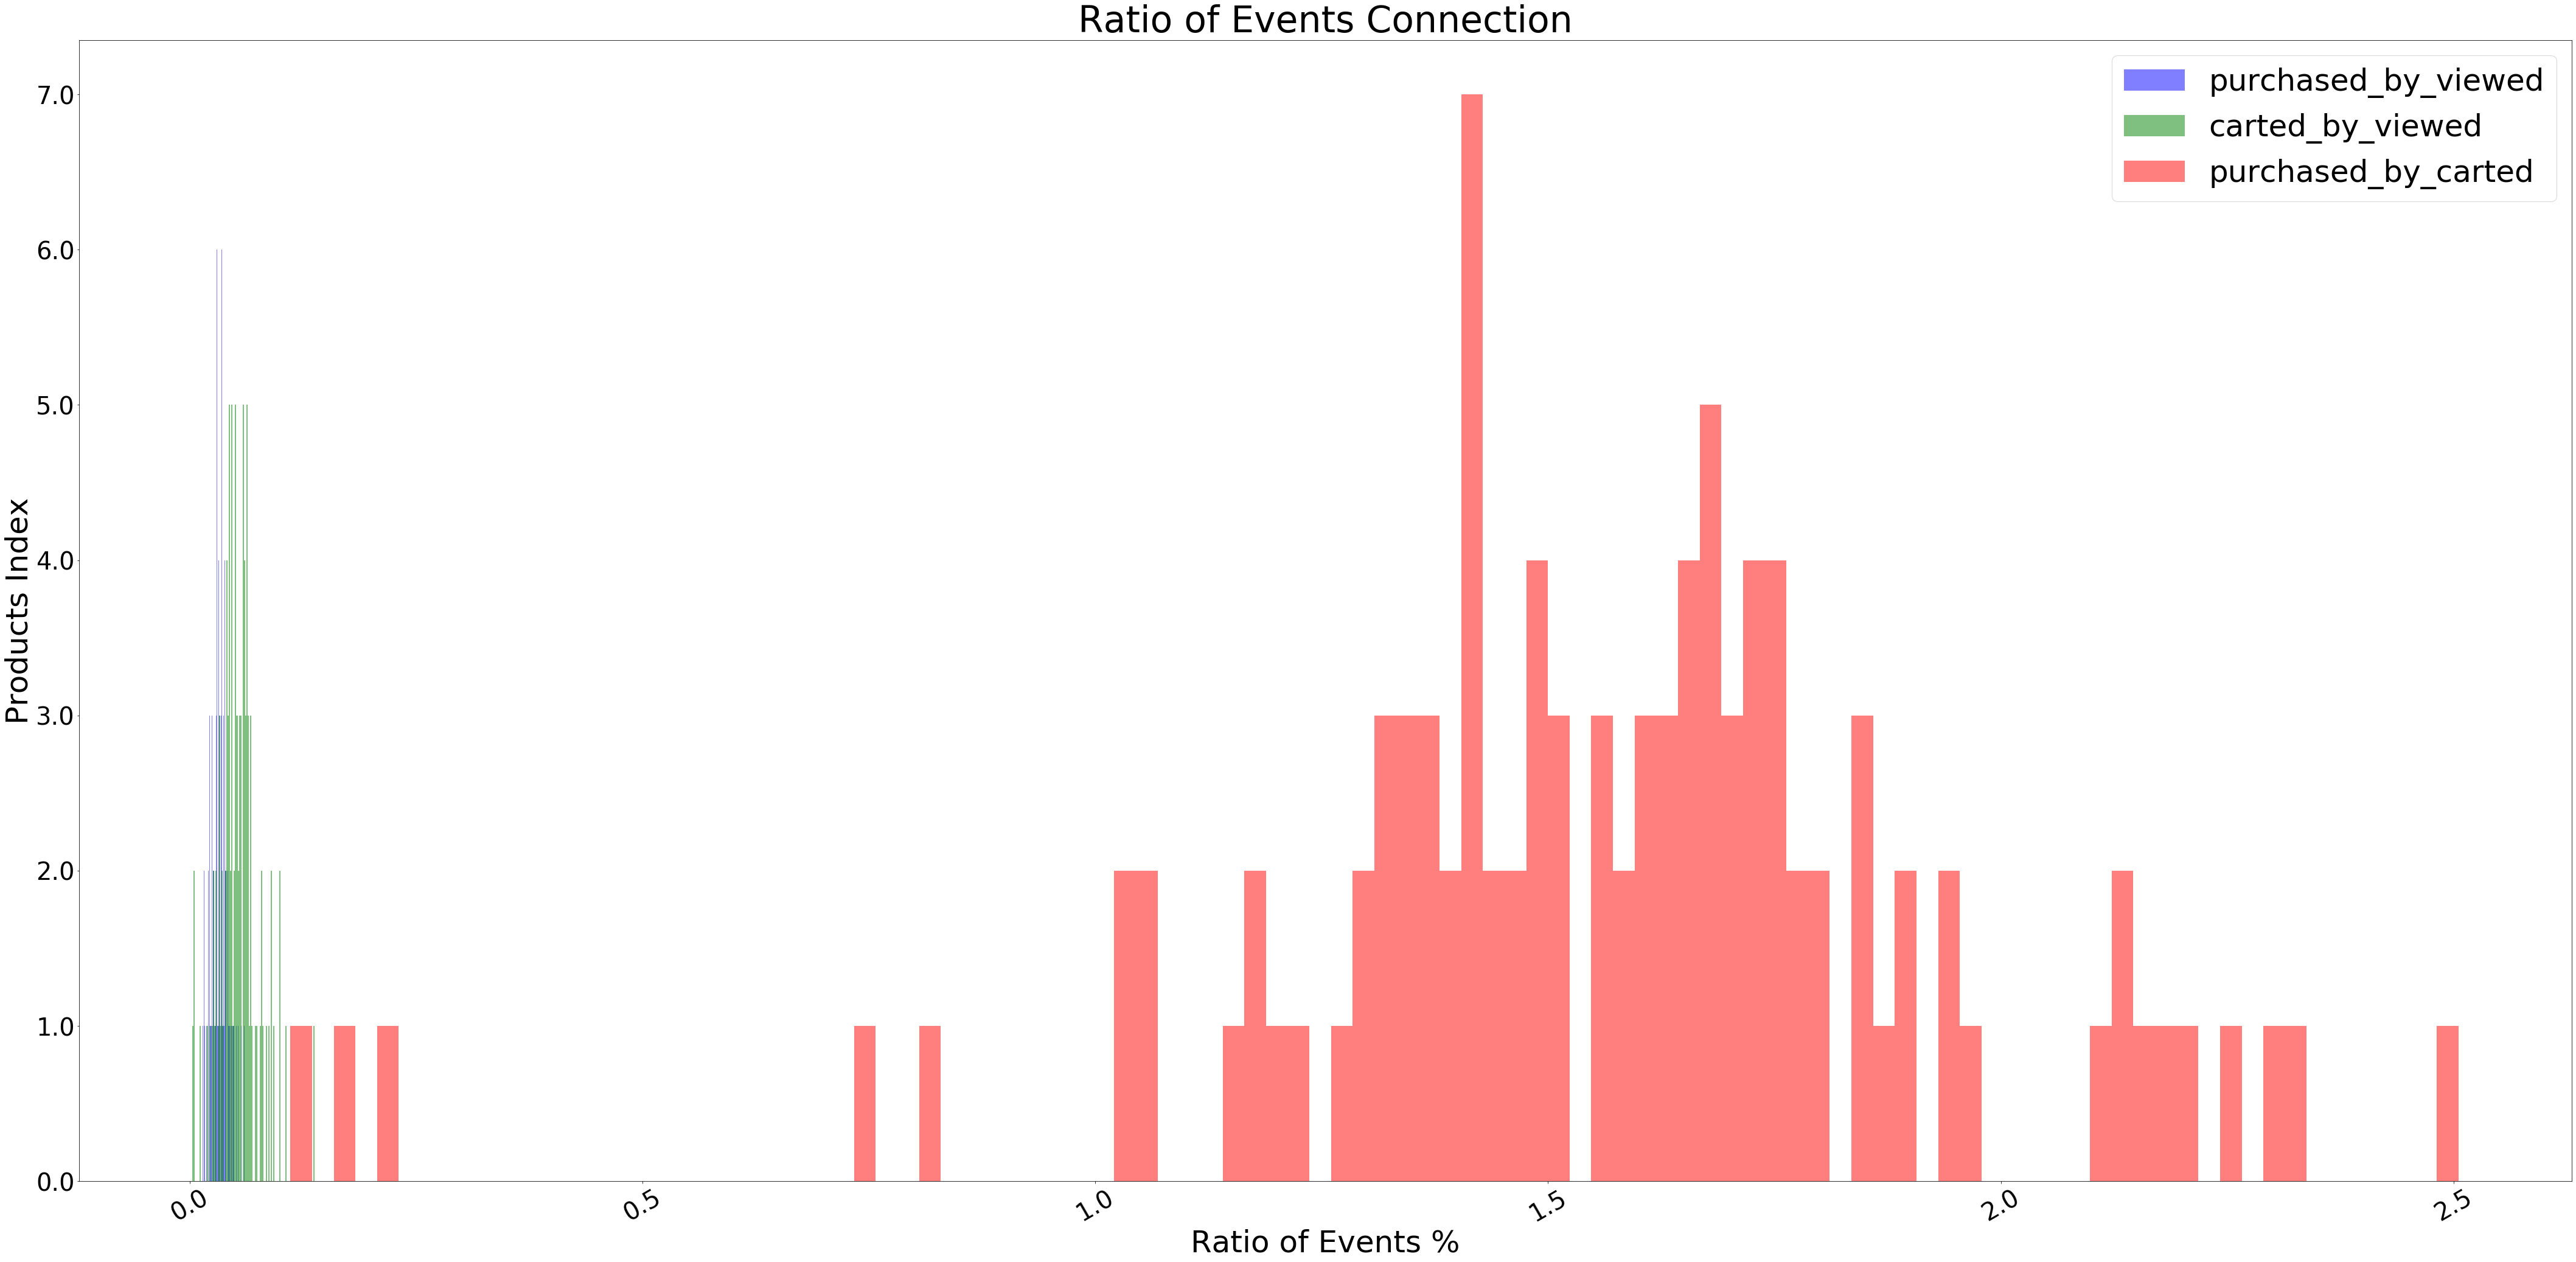

In [16]:
# Ratio of each products being Viewed and purchased 
f, ax = plt.subplots(figsize=(60, 30))

plt.hist(purchased_by_viewed, color="b", bins = 100, alpha = 0.5, label ='purchased_by_viewed')
plt.hist(carted_by_viewed, color="g", bins = 100, alpha = 0.5, label ='carted_by_viewed')
plt.hist(purchased_by_carted, color="r", bins = 100, alpha = 0.5, label ='purchased_by_carted')

ax.set_title("Ratio of Events Connection", fontsize = 60)
ax.set_xlabel("Ratio of Events %", fontsize = 50)
ax.set_ylabel("Products Index", fontsize = 50)
# ax.set_xticklabels(['{:,.1%}'.format(x) for x in xvals], rotation = 30, size = 30)
xvals = ax.get_xticks()
ax.set_xticklabels(['{:,.2}'.format(x) for x in xvals], rotation = 30, size = 40)
yvals = ax.get_yticks()
ax.set_yticklabels(yvals, size = 40)
plt.legend(prop={'size':50})
f.tight_layout(pad=5.0)
plt.show()

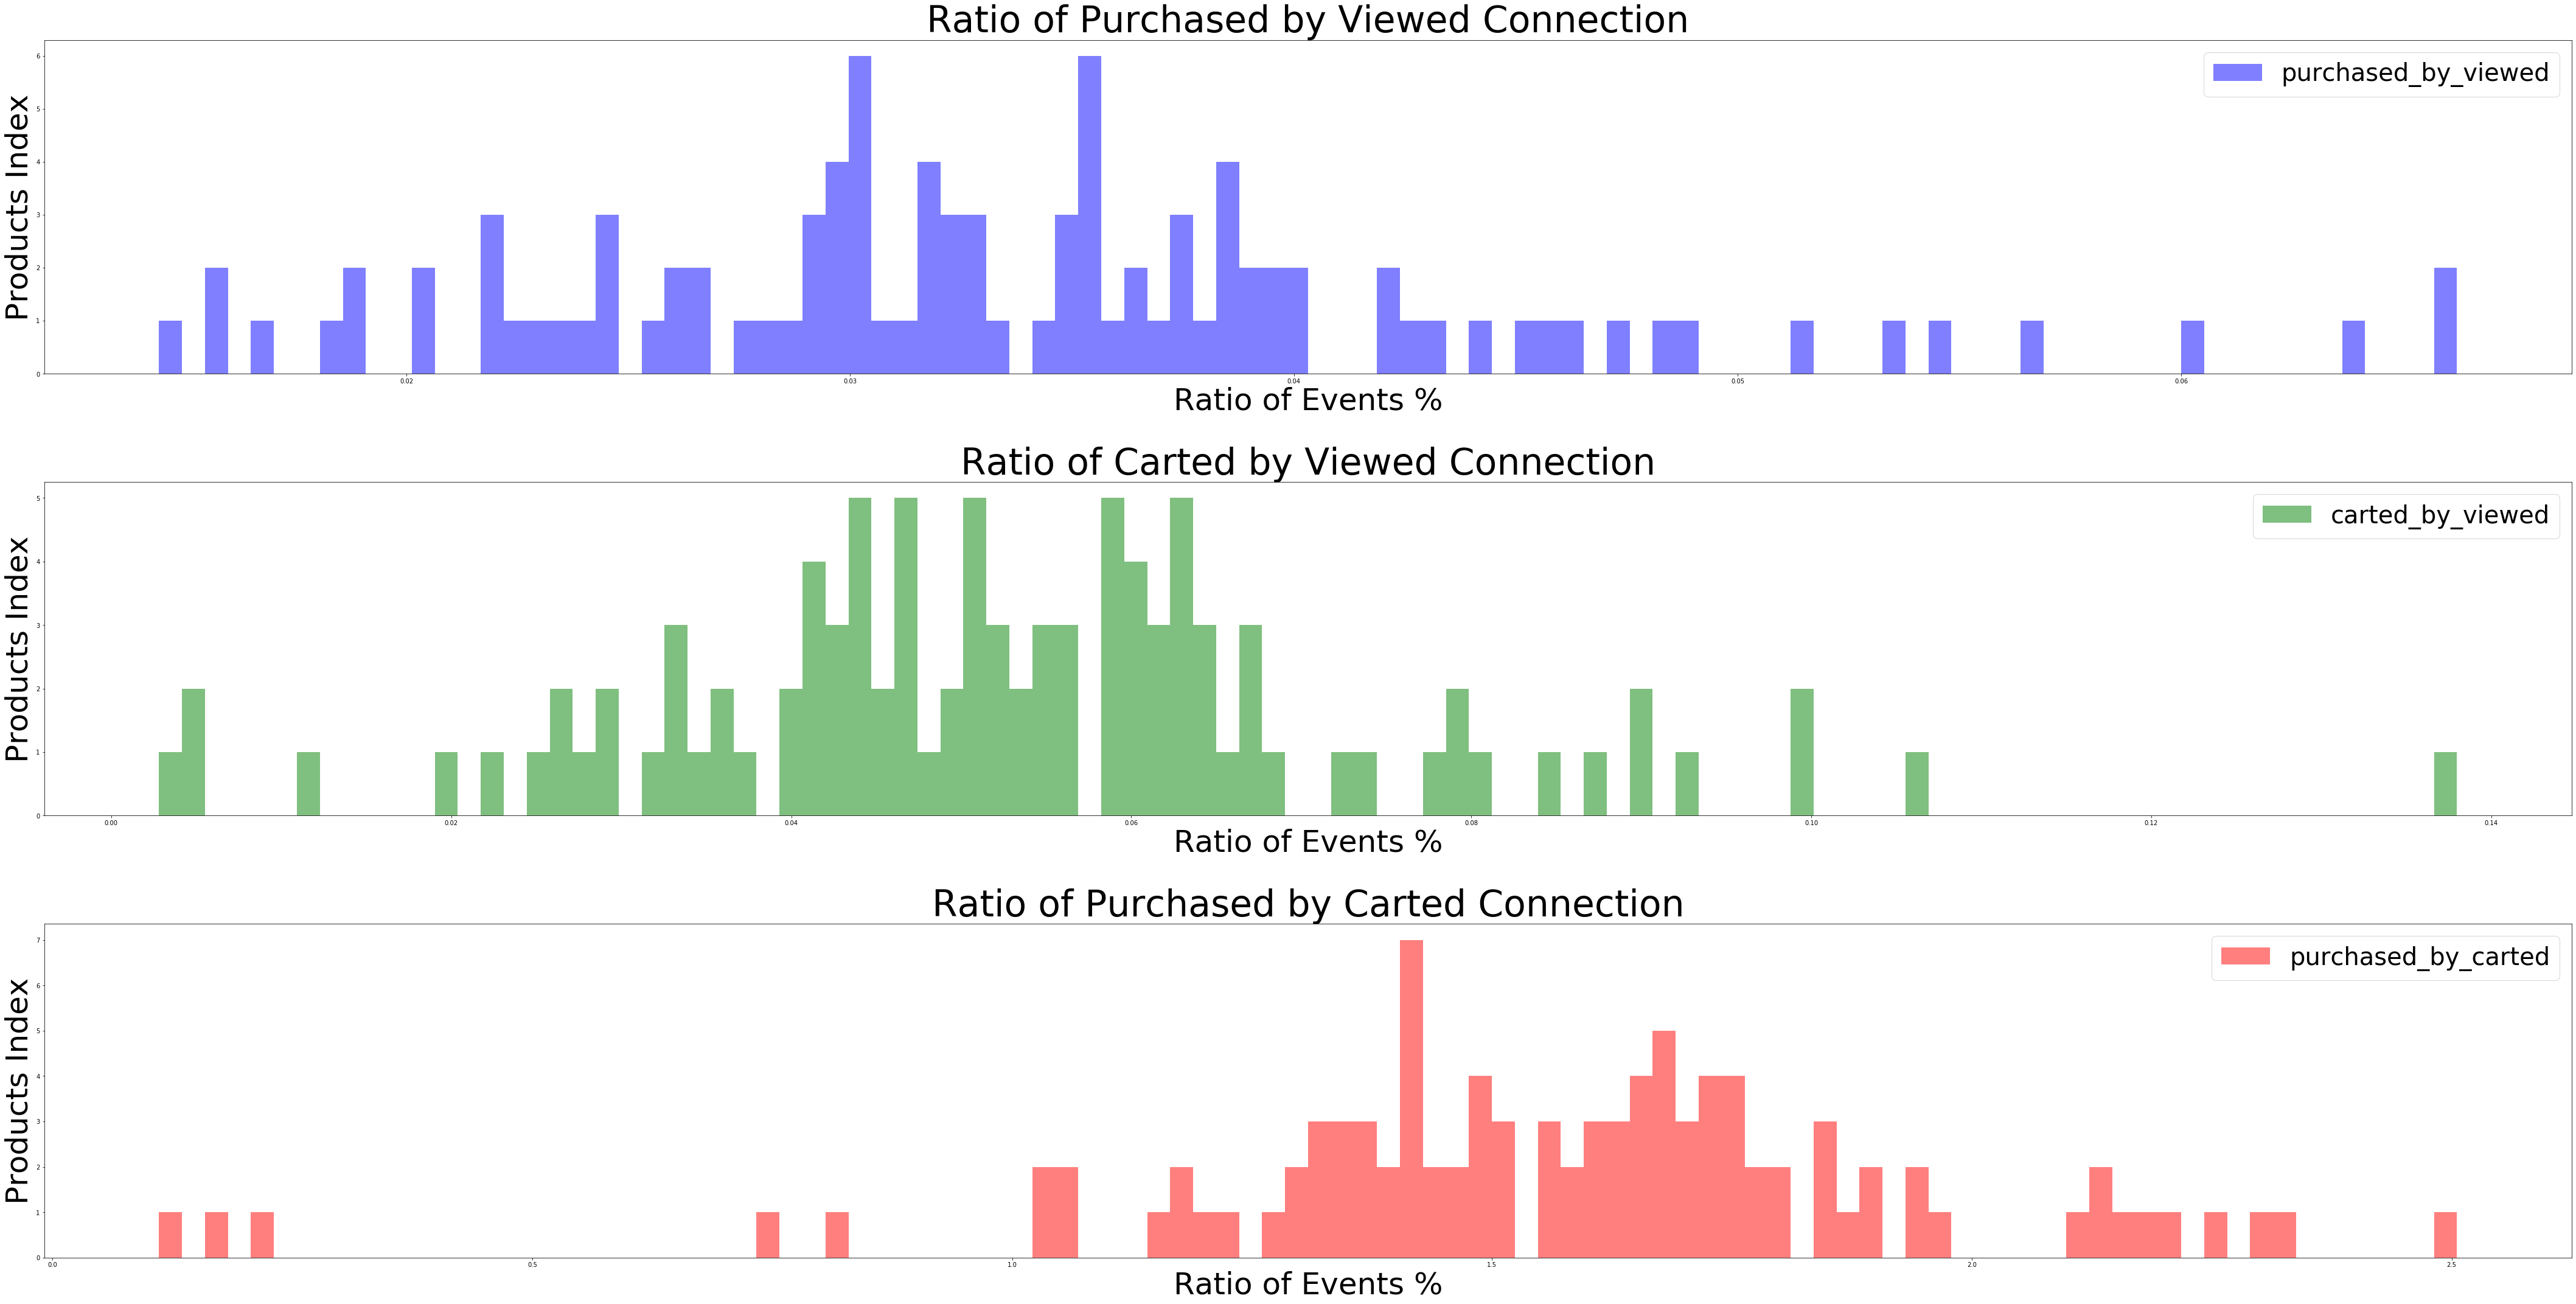

In [11]:
# Ratio of each products being Viewed and purchased 
f, ax = plt.subplots(figsize=(60, 30))

ax = plt.subplot(311)
plt.hist(purchased_by_viewed, color="b", bins = 100, alpha = 0.5, label ='purchased_by_viewed')
#plt.plot(purchased_by_viewed, color="r")
ax.set_title("Ratio of Purchased by Viewed Connection", fontsize = 60)
ax.set_xlabel("Ratio of Events %", fontsize = 50)
ax.set_ylabel("Products Index", fontsize = 50)
ax.legend(prop={'size':40})
f.tight_layout(pad=5.0)

ax = plt.subplot(312)
plt.hist(carted_by_viewed, color="g", bins = 100, alpha = 0.5, label = 'carted_by_viewed')
ax.set_title("Ratio of Carted by Viewed Connection", fontsize = 60)
ax.set_xlabel("Ratio of Events %", fontsize = 50)
ax.set_ylabel("Products Index", fontsize = 50)
ax.legend(prop={'size':40})
f.tight_layout(pad=5.0)

ax = plt.subplot(313)
plt.hist(purchased_by_carted, color="r", bins = 100, alpha = 0.5, label ='purchased_by_carted')
ax.set_title("Ratio of Purchased by Carted Connection", fontsize = 60)
ax.set_xlabel("Ratio of Events %", fontsize = 50)
ax.set_ylabel("Products Index", fontsize = 50)
ax.legend(prop={'size':40})

Three shapes of ratio of events is similar to a normal distribution,therefore, we can conclude that most online shopping users operate in accordance with general shopping habits. 

In [ ]:
# products been view and purchase comparing
viewed_all = df.groupby(by = 'product_id')['event_type'].apply(lambda x: (x =='view').sum()).reset_index(name = 'count').sort_values(['count'], ascending=False).head(100)
carted_all = df.groupby(by = 'product_id')['event_type'].apply(lambda x: (x =='cart').sum()).reset_index(name = 'count').sort_values(['count'], ascending=False).head(100)
purchased_all = df.groupby(by = 'product_id')['event_type'].apply(lambda x: (x =='purchase').sum()).reset_index(name = 'count').sort_values(['count'],ascending=False).head(100)
carted_all

In [54]:
#ratio of each event by total events
totalevent = (purchased_all['count']+ viewed_all['count'] + carted_all['count']).dropna()
# totalevent = totalevent.dropna()

ratio_purchase = purchased_all['count'].dropna()  / totalevent
ratio_view = viewed_all['count'].dropna() / totalevent
ratio_cart = carted_all['count'].dropna() / totalevent
ratio_purchase

22       0.047327
27            NaN
36       0.047949
39            NaN
44       0.039733
           ...   
17447    0.034653
36825         NaN
44091    0.027375
44374         NaN
44378         NaN
Name: count, Length: 100, dtype: float64

In [35]:
# Ratio of each event
f, ax = plt.subplots(figsize=(60, 30))

plt.hist(ratio_purchase, bins = 100, alpha = 0.5, label ='purchased')
plt.hist(ratio_view, bins = 100, alpha = 0.5, label ='viewed')
plt.hist(ratio_cart, bins = 100, alpha = 0.5, label ='carted')

ax.set_title("Ratio of Events Connection", fontsize = 60)
ax.set_xlabel("Index", fontsize = 50)
ax.set_ylabel("Ratio", fontsize = 50)
# ax.set_xticklabels(['{:,.1%}'.format(x) for x in xvals], rotation = 30, size = 30)
xvals = ax.get_xticks()
ax.set_xticklabels(['{:,.2}'.format(x) for x in xvals], rotation = 30, size = 40)
yvals = ax.get_yticks()
ax.set_yticklabels(yvals, size = 40)
plt.legend(prop={'size':50})
f.tight_layout(pad=5.0)
plt.show()

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11523e050> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x115247440> (for post_execute):


KeyboardInterrupt: 

In [32]:
from datetime import datetime
d = datetime.strptime(df['event_time'], "%I:%M%p")
# df['event_time']
d.head()

TypeError: strptime() argument 1 must be str, not Series

In [ ]:
product_event_time = pd.pivot_table(df, index='event_type', columns='event_time', values='price', aggfunc='count', fill_value = 0)
product_event_time.head(100)

In [ ]:
# Event happend time with customer behaviors
product_purchasevalid_time = product_event_time.loc[product_event_time.purchase > 1].reset_index().sort_values(by=['purchase'], ascending = False).head(100)
purchase_bytime = product_purchasevalid_time.groupby(by = 'event_time')['purchase'].sum()

product_viewvalid_time = product_event_time.loc[product_event_time.view > 1].reset_index().sort_values(by=['view'], ascending = False).head(100)
view_bytime = product_viewvalid_time.groupby(by = 'event_time')['view'].sum()

product_cartvalid_time = product_event_time.loc[product_event_time.cart > 1].reset_index().sort_values(by=['cart'], ascending = False).head(100)
cart_bytime = product_cartvalid_time.groupby(by = 'event_time')['cart'].sum()

In [ ]:
f, ax = plt.subplots(figsize=(60, 30))

plt.hist(purchase_bytime, color="b", bins = 100, alpha = 0.5, label = 'Purchase')
plt.hist(view_bytime, color="g", bins = 100, alpha = 0.5, label = 'View')
plt.hist(cart_bytime, color="r", bins = 100, alpha = 0.5, label = 'Cart')

ax.set_title("Event by Time", fontsize = 60)
ax.set_xlabel("Time", fontsize = 60)
ax.set_ylabel("Numbers of Events", fontsize = 60)
ax.set_xticks(product_event_time['event_time'])
plt.legend(prop={'size':60})
plt.show()

In [ ]:
# customer behavior shows on the time
f, ax = plt.subplots(figsize=(60, 30))

ax = plt.subplot(311)
plt.hist(purchase_bytime, color="b", bins = 100)
plt.title("Purchase Event by Time", fontsize = 60)
plt.xlabel("Event Time", fontsize = 50)
plt.ylabel("Purchased", fontsize = 50)
plt.legend(prop={'size':40})
f.tight_layout(pad=5.0)

ax = plt.subplot(312)
plt.hist(view_bytime, color="g", bins = 100, alpha = 0.5)
plt.title("View Event by Time", fontsize = 60)
plt.xlabel("Event Time", fontsize = 50)
plt.ylabel("Viewed", fontsize = 50)
plt.legend(prop={'size':40})
f.tight_layout(pad=5.0)

ax = plt.subplot(313)
plt.hist(cart_bytime, color="r", bins = 100, alpha = 0.5)
plt.title("Cart Event by Time", fontsize = 60)
plt.xlabel("Event Time", fontsize = 50)
plt.ylabel("Carted", fontsize = 50)
plt.legend(prop={'size':40})

In [ ]:
visit_time['event_time'].head()

In [ ]:
# Count the busy time of customer online visiting on scatterplot
visit_time = df.groupby(by='event_time')['event_type'].sum().reset_index(name = 'count').sort_values(['count'])

visit_time_size = visit_time['event_time'].tolist()[-50]
visit_time_label = visit_time['count'].tolist()[-50]

In [ ]:
#Show top 50 busy time by scatter plot
# f, ax = plt.subplots(figsize = (50,50))

# N = 50
# x = visit_time_label
# y = visit_time_size

# colors = np.random.rand(N)
# area = (50 * np.random.rand(N))**2

# plt.scatter(x, y, marker = 'o', c = colors, alpha = 0.5, s = area)
# #plt.scatter(x, y, marker = 'o', c = 'r', alpha = 0.5, s = area)
# plt.legend(y)
# plt.show()